<a href="https://colab.research.google.com/github/Rushikesh419/Machine-learning/blob/main/pytorch_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.5.1+cu121


In [3]:
# creating tensors
scalar= torch.tensor(7)
scalar

tensor(7)

In [4]:
scalar.ndim

0

In [5]:
scalar.item()

7

In [6]:
#vector
vector=torch.tensor([7,7])
vector

tensor([7, 7])

In [7]:
vector.ndim

1

In [8]:
#tensor
tensor=torch.tensor([[[1,2,3],
                      [3,6,9],
                      [2,4,5]]])
tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [9]:
!nvidia-smi

Sat Dec 21 17:51:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
torch.cuda.is_available()

True

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [12]:
tensor.device

device(type='cpu')

In [13]:
tensor_on_gpu=tensor.to(device)
tensor_on_gpu

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]], device='cuda:0')

In [14]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import torch.nn.functional as F

In [15]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=torchvision.transforms.ToTensor(),
                                          download=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 58.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.83MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.3MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.36MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [16]:
class Classifier(nn.Module):
  def __init__(self):
    super(Classifier,self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.dropout1 = nn.Dropout2d(0.25)
    self.dropout2 = nn.Dropout2d(0.5)
    self.fc1 = nn.Linear(64 * 7 * 7, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout2(x)
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [18]:
# Instantiate the model
model = Classifier()

# Move the model to the GPU if available
model.to(device)
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
         Dropout2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          18,496
         MaxPool2d-5             [-1, 64, 7, 7]               0
         Dropout2d-6             [-1, 64, 7, 7]               0
            Linear-7                  [-1, 128]         401,536
            Linear-8                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.43
Params size (MB): 1.61
Estimated Total Size (MB): 2.04
----------------------------------------------------------------


In [19]:
# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
batch_size=100
num_epochs=10
# Split the training set into training and validation sets
val_percent = 0.2 # percentage of the data used for validation
val_size    = int(val_percent * len(train_dataset))
train_size  = len(train_dataset) - val_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset,
                                                           [train_size,
                                                            val_size])

# Create DataLoaders for the training and validation sets
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset,
                                         batch_size=batch_size,
                                         shuffle=False,
                                         pin_memory=True)
losses = []
accuracies = []
val_losses = []
val_accuracies = []
# Train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        images=images.to(device)
        labels=labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
    acc = (predicted == labels).sum().item() / labels.size(0)
    accuracies.append(acc)
    losses.append(loss.item())

    # Evaluate the model on the validation set
    val_loss = 0.0
    val_acc = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            labels=labels.to(device)
            images=images.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        val_acc += correct / total
        val_accuracies.append(acc)
        val_losses.append(loss.item())


    print('Epoch [{}/{}],Loss:{:.4f},Validation Loss:{:.4f},Accuracy:{:.2f},Validation Accuracy:{:.2f}'.format(
        epoch+1, num_epochs, loss.item(), val_loss, acc ,val_acc))

Epoch [1/10],Loss:0.0851,Validation Loss:15.1605,Accuracy:0.96,Validation Accuracy:0.96
Epoch [2/10],Loss:0.0687,Validation Loss:13.1661,Accuracy:0.98,Validation Accuracy:0.98
Epoch [3/10],Loss:0.0723,Validation Loss:9.5555,Accuracy:0.97,Validation Accuracy:0.98
Epoch [4/10],Loss:0.0581,Validation Loss:7.6200,Accuracy:0.98,Validation Accuracy:0.98
Epoch [5/10],Loss:0.0477,Validation Loss:7.5995,Accuracy:0.98,Validation Accuracy:0.98
Epoch [6/10],Loss:0.0456,Validation Loss:6.8332,Accuracy:0.99,Validation Accuracy:0.99
Epoch [7/10],Loss:0.0105,Validation Loss:6.7269,Accuracy:0.99,Validation Accuracy:1.00
Epoch [8/10],Loss:0.0532,Validation Loss:6.8197,Accuracy:0.97,Validation Accuracy:0.96
Epoch [9/10],Loss:0.0267,Validation Loss:6.0761,Accuracy:0.98,Validation Accuracy:0.99
Epoch [10/10],Loss:0.0129,Validation Loss:6.6356,Accuracy:0.99,Validation Accuracy:1.00


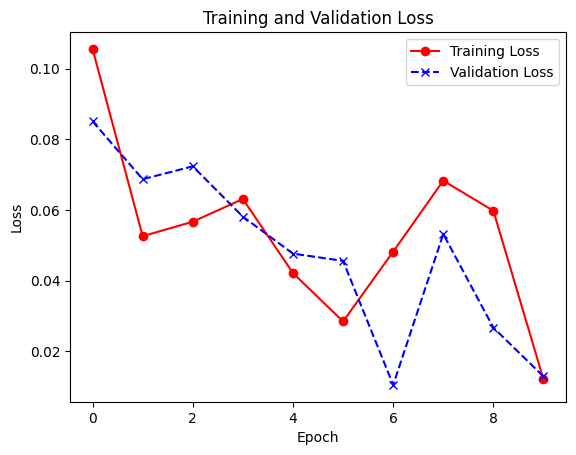

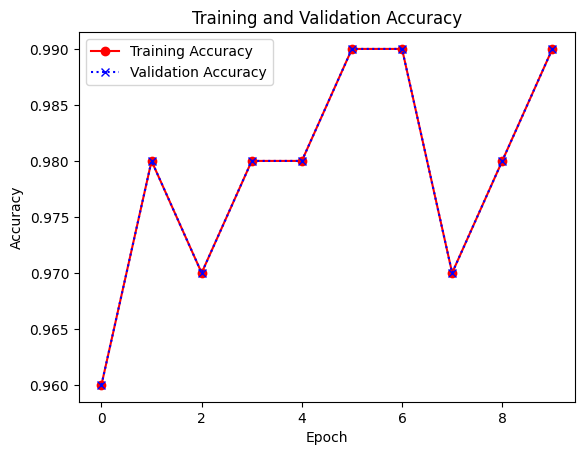

In [21]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over time
plt.plot(range(num_epochs),
         losses, color='red',
         label='Training Loss',
         marker='o')
plt.plot(range(num_epochs),
         val_losses,
         color='blue',
         linestyle='--',
         label='Validation Loss',
         marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over time
plt.plot(range(num_epochs),
         accuracies,
         label='Training Accuracy',
         color='red',
         marker='o')
plt.plot(range(num_epochs),
         val_accuracies,
         label='Validation Accuracy',
         color='blue',
         linestyle=':',
         marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [22]:
# Create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Evaluate the model on the test dataset
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted=predicted.to('cpu')
        labels=labels.to('cpu')
        y_true.extend(labels)
        y_pred.extend(predicted)

print('Test Accuracy: {}%'.format(100 * correct / total))

# Generate a classification report

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

Test Accuracy: 99.08%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

